In [1]:
import numpy as np
from math import factorial
from random import random
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def poiss(k,lmbda):
    '''Poisson distribution with parameters λ>0 and k=0,1,2,…
    
    λ (lmbda) gives the distribution's mean
    returns the value of the distribution at k'''
    return lmbda**k*np.e**-lmbda/factorial(k)

In [3]:
def cmpd_instpoiss(n,dt,lambd):
    '''Return a compound Poisson process with its corrisponding time series.
    
    The likelihood of an event is based on time since last event.
    In other words events are determined instantaneously (at the current time).
    
    n = the number data points
    dt = the size of the time steps taken
    lambd = an intenisty parameter controling an exponential distribution.'''
    t_e = 0
    p_t = 0
    t_series = []
    p_series = []
    for i in range(n):
        t_e+=dt
        if np.e**(-lambd*t_e)<random():
            t_series.append(i*dt)
            p_series.append(p_t)
            p_t+=gauss(0,1*np.sqrt(dt))
            t_e=0
        t_series.append(i*dt)
        p_series.append(p_t)
    t_series.append(n*dt)
    p_series.append(p_t)
    return t_series,p_series

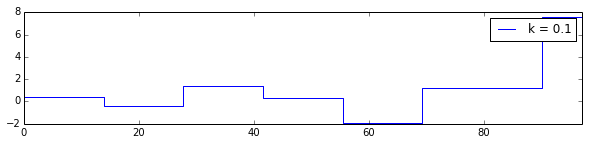

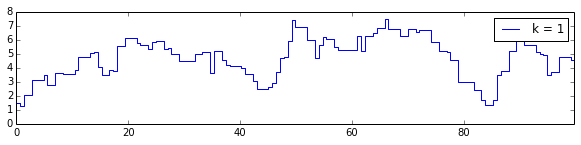

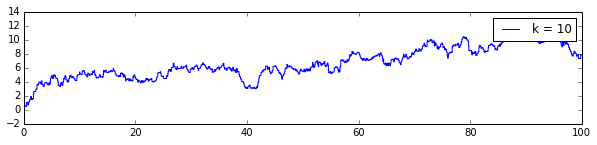

In [4]:
from poisson import cmpd_instpoiss as cip
k=0.1
dt = np.log(2)/k
t,p = cip(int(100/dt),dt,k)
plt.figure(figsize=(10,2))
plt.plot(t,p,label='k = {0}'.format(k))
plt.xlim(xmax=t[-1])
plt.legend()
plt.show()

k=1
dt = np.log(2)/k
t,p = cip(int(100/dt),dt,k)
plt.figure(figsize=(10,2))
plt.plot(t,p,label='k = {0}'.format(k))
plt.xlim(xmax=t[-1])
plt.legend()
plt.show()

k=10
dt = np.log(2)/k
t,p = cip(int(100/dt),dt,k)
plt.figure(figsize=(10,2))
plt.plot(t,p,label='k = {0}'.format(k))
plt.xlim(xmax=t[-1])
plt.legend()
plt.show()

In [5]:
def cmpd_predpoiss(t,lambd):
    '''Return a compound Poisson process with its corrisponding time series.
    
    Time between events is drawn from an exponential distribution.
    In other words events a predetermined at the time of the last event.
    
    t = upper limit on t
    dt = the size of the time steps taken
    lambd = an intenisty parameter controling an exponential distribution.'''
    p_t = 0
    t_e = 0
    t_series = []
    p_series = []
    while t_e<t:
        t_series.append(t_e)
        p_series.append(p_t)
        dte = np.log(random())/-lambd
        t_e += dte
        t_series.append(t_e)
        p_series.append(p_t)
        p_t += gauss(0,1*np.sqrt(dte))
    t_series[-1] = t
    return t_series,p_series

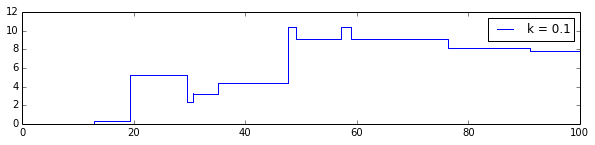

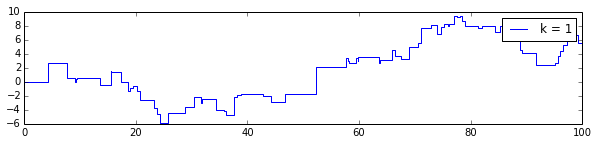

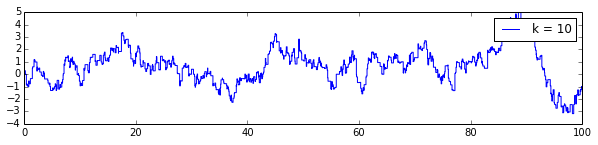

In [6]:
from poisson import cmpd_predpoiss as cpp
k=0.1
t,p = cpp(100,k)
plt.figure(figsize=(10,2))
plt.plot(t,p,label='k = {0}'.format(k))
plt.xlim(xmax=t[-1])
plt.legend()
plt.show()

k=1
t,p = cpp(100,k)
plt.figure(figsize=(10,2))
plt.plot(t,p,label='k = {0}'.format(k))
plt.xlim(xmax=t[-1])
plt.legend()
plt.show()

k=10
t,p = cpp(100,k)
plt.figure(figsize=(10,2))
plt.plot(t,p,label='k = {0}'.format(k))
plt.xlim(xmax=t[-1])
plt.legend()
plt.show()